<IPython.core.display.Javascript object>


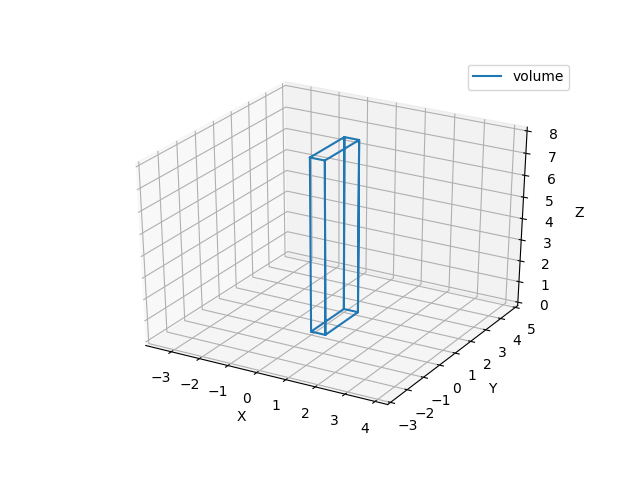

In [1]:
%matplotlib notebook  

from ef_jupyter_visualize import *

efconf = EfConf()

time_grid = TimeGrid(
    total_time = 5.0e-9,
    time_save_step = 5.0e-10,
    time_step_size = 5.0e-11,
)

spat_mesh = SpatialMesh(
    grid_x_size = 0.5,
    grid_x_step = 0.02,
    grid_y_size = 2.0,
    grid_y_step = 0.04,
    grid_z_size = 8.0,
    grid_z_step = 0.1,
)

efconf.time_grid = time_grid
efconf.spatial_mesh = spat_mesh
efconf.visualize()
                  

<IPython.core.display.Javascript object>


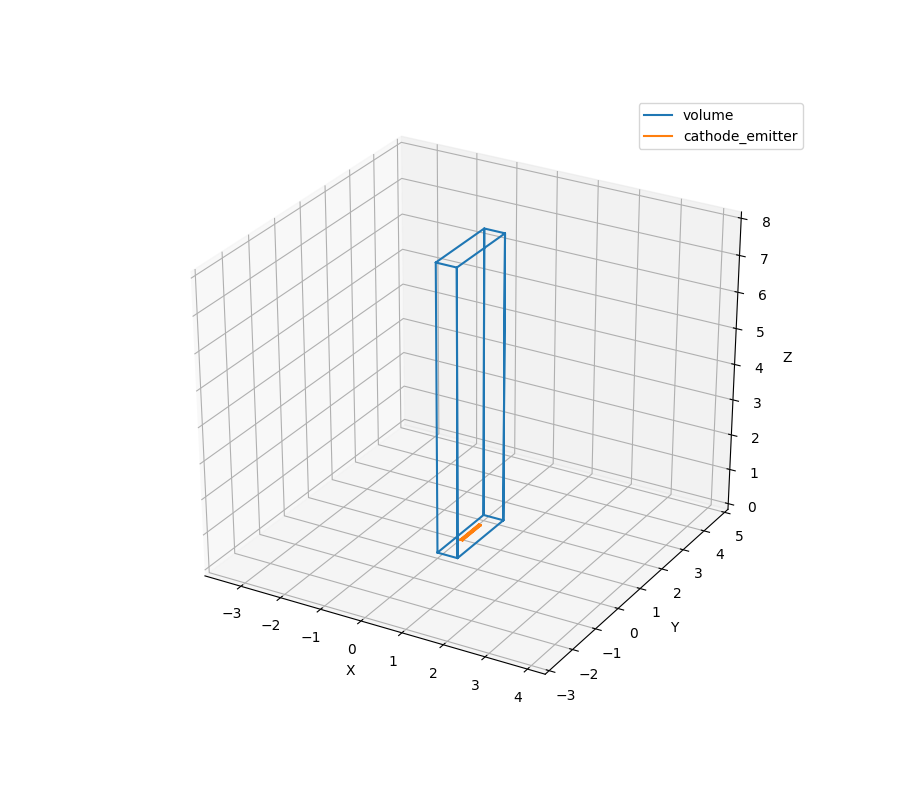

In [2]:
# переделать в цилиндрический источник
box_src = ParticleSourceBox( 
    name = 'cathode_emitter',
    initial_number_of_particles = 5000,
    particles_to_generate_each_step = 5000,
    box_x_left = 0.275,
    box_x_right = 0.225,
    box_y_bottom = 0.6,
    box_y_top = 1.4,
    box_z_near = 0.11,
    box_z_far = 0.12,
    mean_momentum_x = 0,
    mean_momentum_y = 0,
    mean_momentum_z = 8.85e-17,
    temperature = 0.0,
    charge = -2.398e-08,
    mass = 4.89e-26 )
efconf.add_source( box_src )
efconf.visualize()

<IPython.core.display.Javascript object>


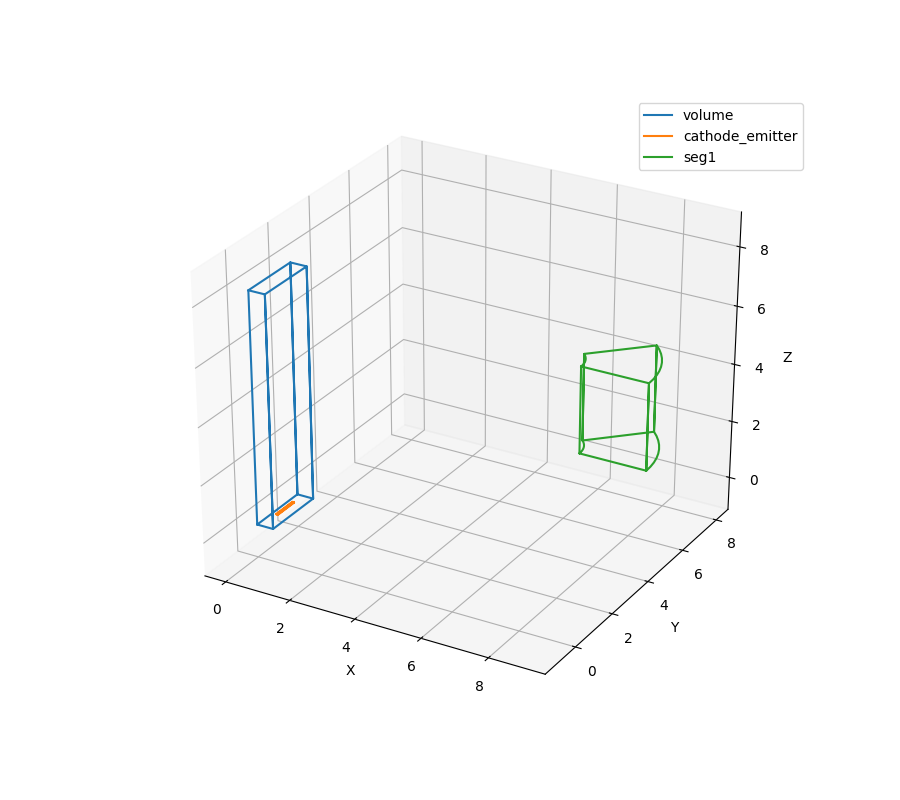

In [3]:
seg1 = InnerRegionTubeAlongZSegment( 
    name = 'seg1',
    potential = 10,
    tube_segment_axis_x = 6, 
    tube_segment_axis_y = 5,
    tube_segment_axis_start_z = 2, 
    tube_segment_axis_end_z = 5,
    tube_segment_inner_radius = 1, 
    tube_segment_outer_radius = 3,
    tube_segment_start_angle_deg = 0, 
    tube_segment_end_angle_deg = 45 )
efconf.add_source( seg1 )
efconf.visualize()

<IPython.core.display.Javascript object>


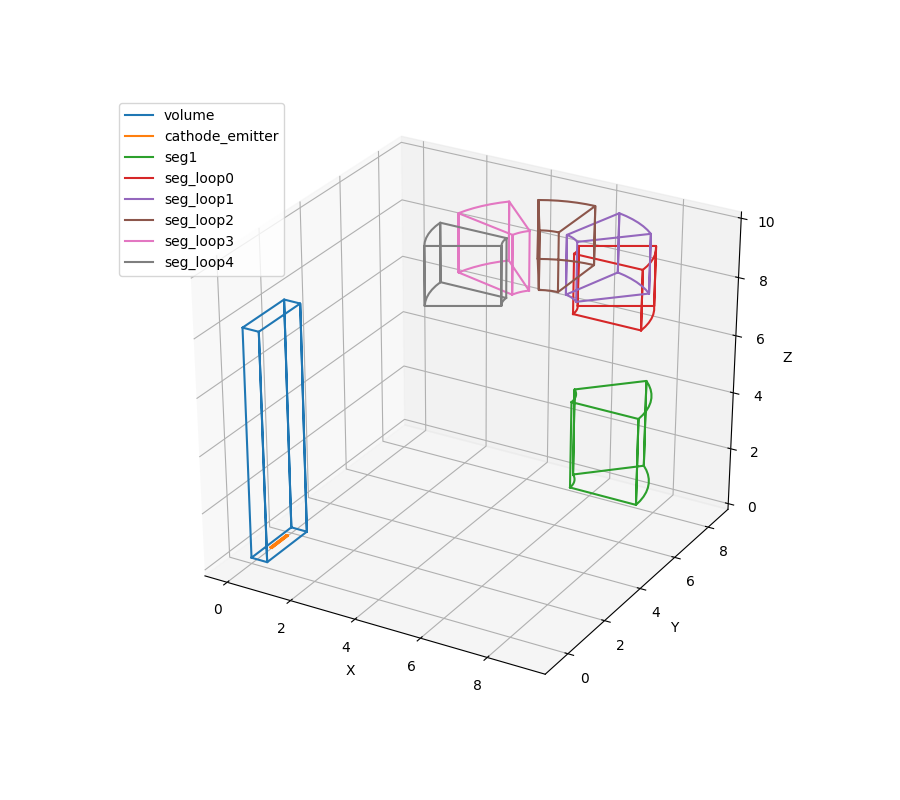

In [4]:
n_of_segments = 5
starting_angle = 0
seg_arc_len = 30
seg_arc_gap = 15
for i in range( n_of_segments ):
    seg = InnerRegionTubeAlongZSegment( 
        name = 'seg_loop' + str(i),
        potential = 10,
        tube_segment_axis_x = 6, 
        tube_segment_axis_y = 5,
        tube_segment_axis_start_z = 8, 
        tube_segment_axis_end_z = 10,
        tube_segment_inner_radius = 1, 
        tube_segment_outer_radius = 3,
        tube_segment_start_angle_deg = starting_angle + (seg_arc_len + seg_arc_gap) * i, 
        tube_segment_end_angle_deg = seg_arc_len + (seg_arc_len + seg_arc_gap) * i )
    efconf.add_source( seg )
efconf.visualize()

In [5]:
efconf.print_config()


[Spatial mesh]
grid_z_step  =  0.1
grid_y_size  =  2.0
grid_z_size  =  8.0
grid_x_step  =  0.02
grid_y_step  =  0.04
grid_x_size  =  0.5

[Time grid]
total_time  =  5e-09
time_save_step  =  5e-10
time_step_size  =  5e-11

[Inner_region_tube_along_z_segment.seg_loop0]
tube_segment_axis_end_z  =  10
tube_segment_outer_radius  =  3
tube_segment_axis_x  =  6
tube_segment_end_angle_deg  =  30
tube_segment_axis_start_z  =  8
tube_segment_start_angle_deg  =  0
potential  =  10
tube_segment_axis_y  =  5
tube_segment_inner_radius  =  1

[Inner_region_tube_along_z_segment.seg_loop1]
tube_segment_axis_end_z  =  10
tube_segment_outer_radius  =  3
tube_segment_axis_x  =  6
tube_segment_end_angle_deg  =  75
tube_segment_axis_start_z  =  8
tube_segment_start_angle_deg  =  45
potential  =  10
tube_segment_axis_y  =  5
tube_segment_inner_radius  =  1

[Inner_region_tube_along_z_segment.seg_loop4]
tube_segment_axis_end_z  =  10
tube_segment_outer_radius  =  3
tube_segment_axis_x  =  6
tube_segment_end_a

In [ ]:
# Пока консольный вывод отображается не по мере поступления, а весь целиком после завершения. 
# Думаю, получится исправить.
# In case of "box_x_right > box_x_left" error, switch values and recompute all cells
efconf.run()

In [ ]:
!ls

In [ ]:
import h5py
import matplotlib as mpl

# Отрисовку частиц можно будет упаковать в функцию efconf.plot_particles()

filename = 'out_0000100.h5'
h5file = h5py.File( filename, mode = "r" )

x = h5file["/Particle_sources/cathode_emitter/position_x"]
y = h5file["/Particle_sources/cathode_emitter/position_y"]
z = h5file["/Particle_sources/cathode_emitter/position_z"]
pz = h5file["/Particle_sources/cathode_emitter/momentum_z"]

x = x[::200]
y = y[::200]
z = z[::200]
pz = pz[::200]

col_norm = mpl.colors.Normalize( min(pz), max(pz) ) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s = 1, c = col_norm(pz) )
#
extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
sz = extents[:,1] - extents[:,0]
centers = np.mean(extents, axis=1)
maxsize = max(abs(sz))
r = maxsize/2
for ctr, dim in zip(centers, 'xyz'):
    getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)
#
plt.show()

In [ ]:
# Вариант с ipyvolume. 
# Может заработает.

import h5py
import numpy as np
import ipyvolume as ipv

filename = 'out_0000100.h5'
h5file = h5py.File( filename, mode = "r" )

x = h5file["/Particle_sources/cathode_emitter/position_x"]
y = h5file["/Particle_sources/cathode_emitter/position_y"]
z = h5file["/Particle_sources/cathode_emitter/position_z"]

#x = x[::20]
#y = y[::20]
#z = z[::20]

ipv.quickscatter(x, y, z, size=0.1, marker="sphere")


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
print( fig_size )

In [ ]:
plt.rcParams["figure.figsize"] = [9, 9]